<a href="https://colab.research.google.com/github/iemanihsanalwi/F1-Data-Analysis/blob/main/fastf1_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websockets-15.0.1:
      Successfully uninstalled websockets-15.0.1


# Import Packages

In [ ]:
import fastf1
import fastf1.plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from timple.timedelta import strftimedelta
from fastf1.core import Laps
from fastf1 import plotting
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib import colormaps
import seaborn as sns
import plotly.express as px
from plotly.io import show
from fastf1.ergast import Ergast

fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False, color_scheme='fastf1')

year = 2025
wknd = 6
ses = 'Q'

# Load the session
session = fastf1.get_session(year, wknd, ses)
session.load()

core           INFO 	Loading data for Miami Grand Prix - Qualifying [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Miami Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req            I

# Qualifying results - 2025 Miami GP

In [ ]:
drivers = pd.unique(session.laps['Driver'])
drivers

array(['VER', 'NOR', 'ANT', 'PIA', 'RUS', 'SAI', 'ALB', 'LEC', 'OCO',
       'TSU', 'HAD', 'HAM', 'BOR', 'DOO', 'LAW', 'HUL', 'ALO', 'GAS',
       'STR', 'BEA'], dtype=object)

In [ ]:
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_drivers(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)

fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

In [ ]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

In [ ]:
fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']]

,Driver,LapTime,LapTimeDelta
0,VER,0 days 00:01:26.204000,0 days 00:00:00
1,NOR,0 days 00:01:26.269000,0 days 00:00:00.065000
2,PIA,0 days 00:01:26.269000,0 days 00:00:00.065000
3,ANT,0 days 00:01:26.271000,0 days 00:00:00.067000
4,RUS,0 days 00:01:26.385000,0 days 00:00:00.181000
5,SAI,0 days 00:01:26.569000,0 days 00:00:00.365000
6,ALB,0 days 00:01:26.682000,0 days 00:00:00.478000
7,LEC,0 days 00:01:26.754000,0 days 00:00:00.550000
8,OCO,0 days 00:01:26.824000,0 days 00:00:00.620000
9,TSU,0 days 00:01:26.943000,0 days 00:00:00.739000


In [ ]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.get_team_color(lap['Team'], session=session)
    team_colors.append(color)

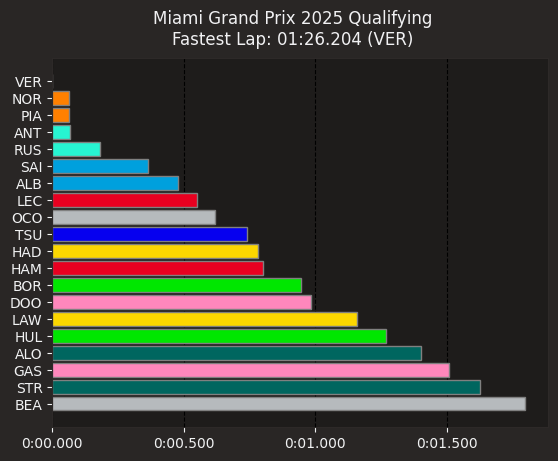

In [ ]:
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', color='black', linestyle='--', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
            f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")
plt.show()

# Overlaying speed traces of two laps

In [ ]:
first_drv = fastest_laps['Driver'].iloc[0]
sec_drv = fastest_laps['Driver'].iloc[1]

In [ ]:
first_lap = session.laps.pick_drivers(first_drv).pick_fastest()
sec_lap = session.laps.pick_drivers(sec_drv).pick_fastest()

In [ ]:
first_tel = first_lap.get_car_data().add_distance()
sec_tel = sec_lap.get_car_data().add_distance()

In [ ]:
circuit_info = session.get_circuit_info()

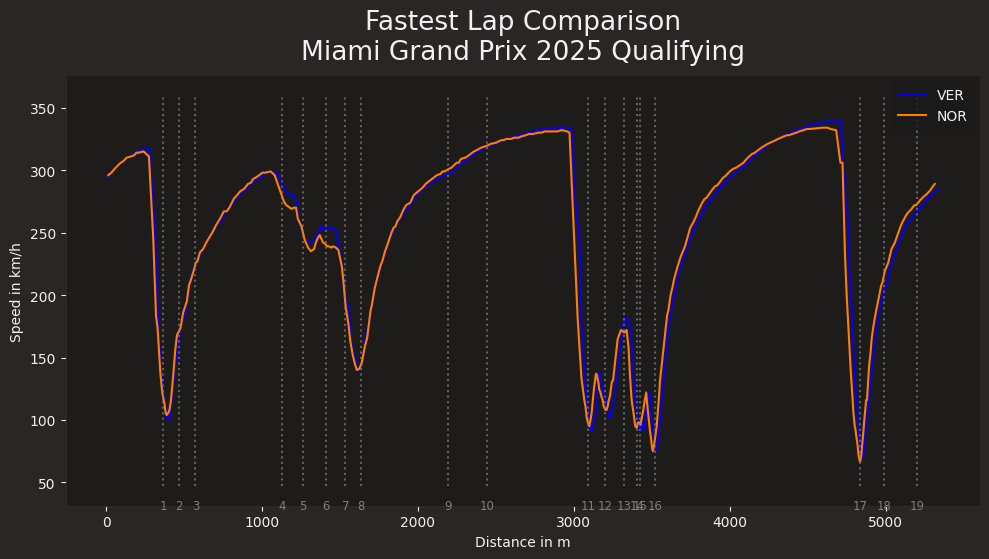

In [ ]:
first_color = fastf1.plotting.get_team_color(first_lap['Team'], session=session)
sec_color = fastf1.plotting.get_team_color(sec_lap['Team'], session=session)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot speed vs distance
ax.plot(first_tel['Distance'], first_tel['Speed'], color=first_color, label=first_drv)
ax.plot(sec_tel['Distance'], sec_tel['Speed'], color=sec_color, label=sec_drv)

# Draw vertical dotted lines at each corner
v_min = min(first_tel['Speed'].min(), sec_tel['Speed'].min()) - 20
v_max = max(first_tel['Speed'].max(), sec_tel['Speed'].max()) + 20
ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min, ymax=v_max,
          linestyles='dotted', colors='grey', alpha=0.7)

# Plot the corner number and letter just below each vertical line
for _, corner in circuit_info.corners.iterrows():
    txt = f"{int(corner['Number'])}{corner['Letter']}"
    ax.text(corner['Distance'], v_min - 10, txt,
            va='top', ha='center', size='small', color='grey')

# Set labels and title
ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')
ax.set_title(f"Fastest Lap Comparison\n{session.event['EventName']} {session.event.year} Qualifying")
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout for title
plt.show()

# Gear shifts on track

In [ ]:
lap = session.laps.pick_fastest()
tel = lap.get_telemetry()

In [ ]:
x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)

In [ ]:
cmap = colormaps['Paired']
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

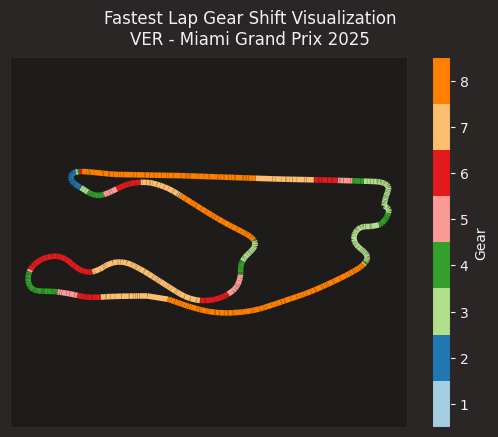

In [ ]:
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {session.event['EventName']} {session.event.year}"
)

cbar = plt.colorbar(mappable=lc_comp, label="Gear",
                    boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()

# Load New Session

In [ ]:
year = 2025
wknd = 6
ses = 'S'

# Load the session
session = fastf1.get_session(year, wknd, ses)
session.load()

# Speed visualization on track map

In [ ]:
driver = 'HAM'
colormap = mpl.cm.plasma
weekend = session.event
lap = session.laps.pick_drivers(driver).pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

In [ ]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

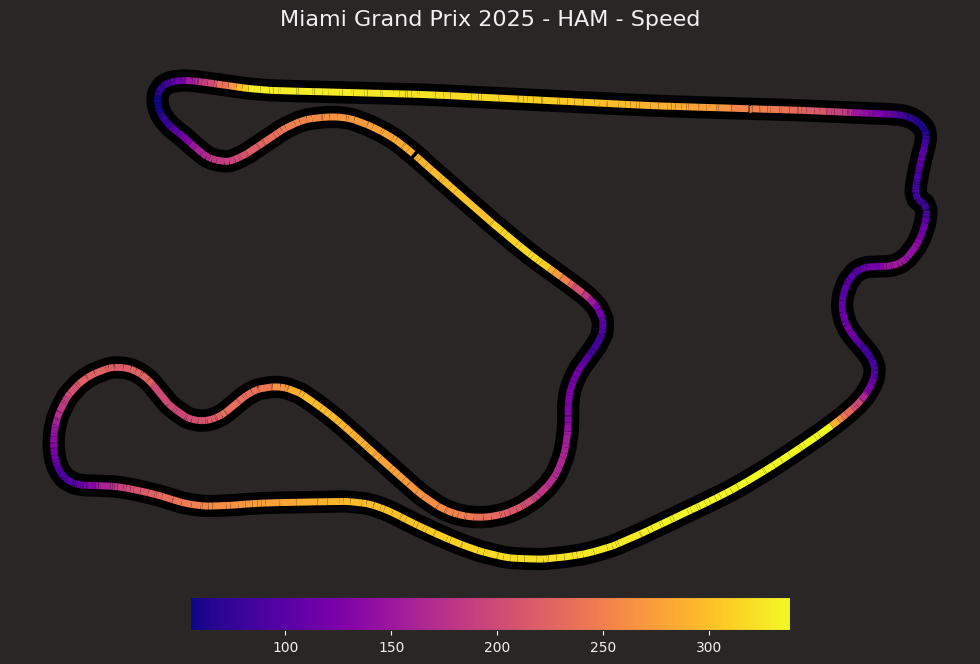

In [ ]:
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f"{session.event['EventName']} {year} - {driver} - Speed", size=16, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'],
        color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm,
                    linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
                                   orientation="horizontal")


# Show the plot
plt.show()

# Team Pace Comparison

In [ ]:
laps = session.laps.pick_quicklaps()

transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.get_team_color(team, session=session)
                for team in team_order}

Index(['McLaren', 'Red Bull Racing', 'Mercedes', 'Ferrari', 'Aston Martin',
       'Racing Bulls', 'Williams', 'Alpine', 'Haas F1 Team', 'Kick Sauber'],
      dtype='object', name='Team')


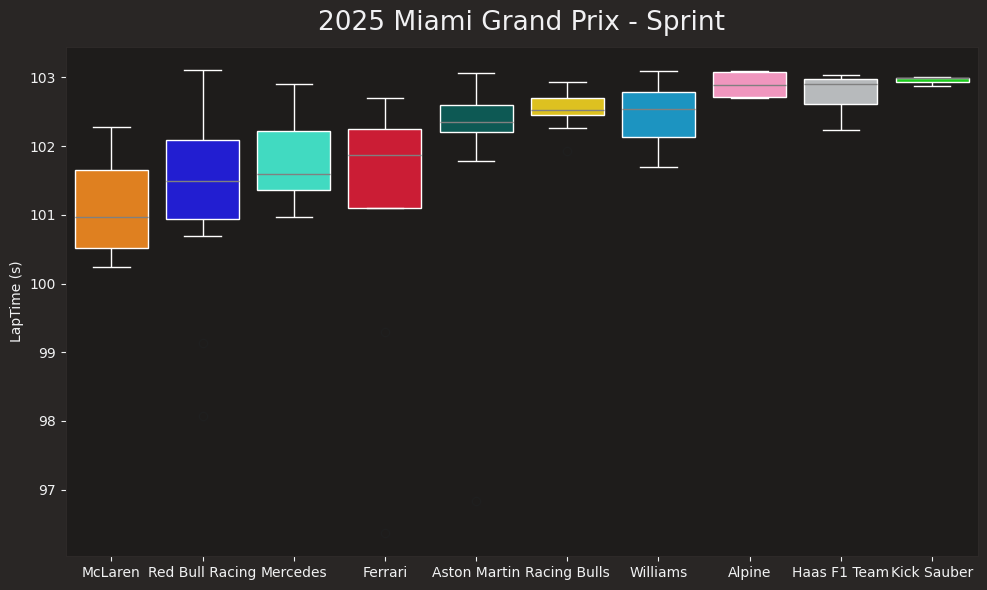

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title(f"{session.event.year} {session.event['EventName']} - {session.name}")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

# Driver specific plot styling

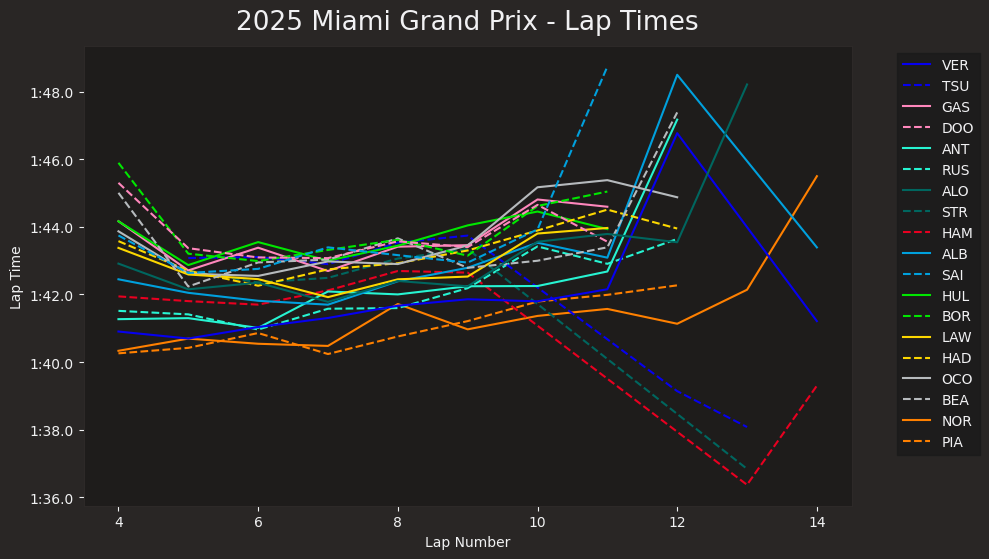

In [ ]:
plotting.setup_mpl(color_scheme='fastf1', misc_mpl_mods=False)

fig, ax = plt.subplots(figsize=(10, 6))

for driver in session.laps['Driver'].unique():
    laps = session.laps.pick_drivers(driver).pick_quicklaps().reset_index()
    style = plotting.get_driver_style(identifier=driver,
                                      style=['color', 'linestyle'],
                                      session=session)
    ax.plot(laps['LapNumber'], laps['LapTime'], **style, label=driver)

# add axis labels and a title
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
plt.title(f"{session.event.year} {session.event['EventName']} - Lap Times")

# Add the sorted driver legend and get the legend object
legend = plotting.add_sorted_driver_legend(ax, session)

# Place the legend outside the plot area
if legend:
    legend.set_bbox_to_anchor((1.05, 1))
    legend.set_loc('upper left')

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to make space for the legend
plt.show()

# Position changes during a race

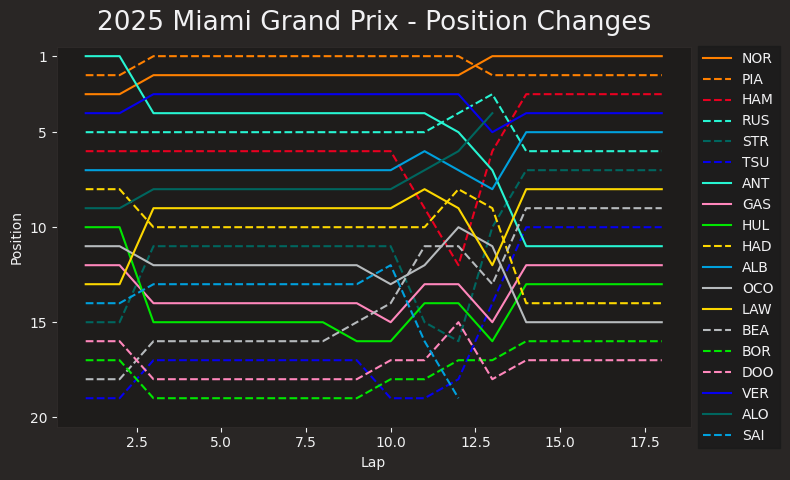

In [ ]:
fig, ax = plt.subplots(figsize=(8.0, 4.9))

for drv in session.drivers:
    drv_laps = session.laps.pick_drivers(drv)

    # Check if drv_laps is empty before accessing 'Driver' column
    if not drv_laps.empty:
        abb = drv_laps['Driver'].iloc[0]
        style = fastf1.plotting.get_driver_style(identifier=abb,
                                                 style=['color', 'linestyle'],
                                                 session=session)

        ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
                label=abb, **style)

ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')
plt.title(f"{session.event.year} {session.event['EventName']} - Position Changes")
ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()

# Tyre strategies during a race

In [ ]:
laps = session.laps
drivers = session.drivers
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()
stints = stints.rename(columns={"LapNumber": "StintLength"})

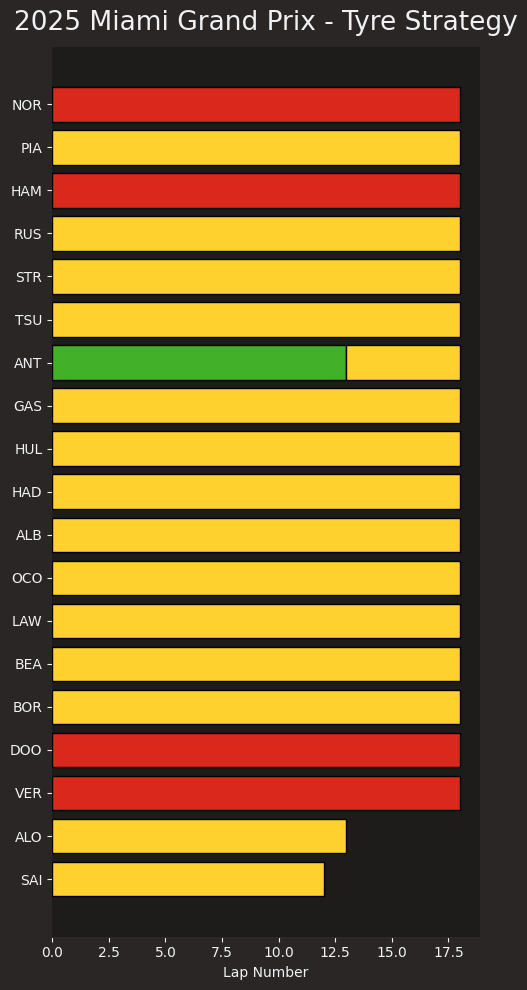

In [ ]:
fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        compound_color = fastf1.plotting.get_compound_color(row["Compound"],
                                                            session=session)
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=compound_color,
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

# sphinx_gallery_defer_figures

###############################################################################
# Make the plot more readable and intuitive
plt.title(f"{session.event.year} {session.event['EventName']} - Tyre Strategy")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

# sphinx_gallery_defer_figures

###############################################################################
# Plot aesthetics
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

# Driver Laptimes Distribution Visualization

In [ ]:
point_finishers = session.drivers[:10]
print(point_finishers)
driver_laps = session.laps.pick_drivers(point_finishers).pick_quicklaps()
driver_laps = driver_laps.reset_index()

['4', '81', '44', '63', '18', '22', '12', '10', '27', '6']


In [ ]:
finishing_order = [session.get_driver(i)["Abbreviation"] for i in point_finishers]
print(finishing_order)

['NOR', 'PIA', 'HAM', 'RUS', 'STR', 'TSU', 'ANT', 'GAS', 'HUL', 'HAD']


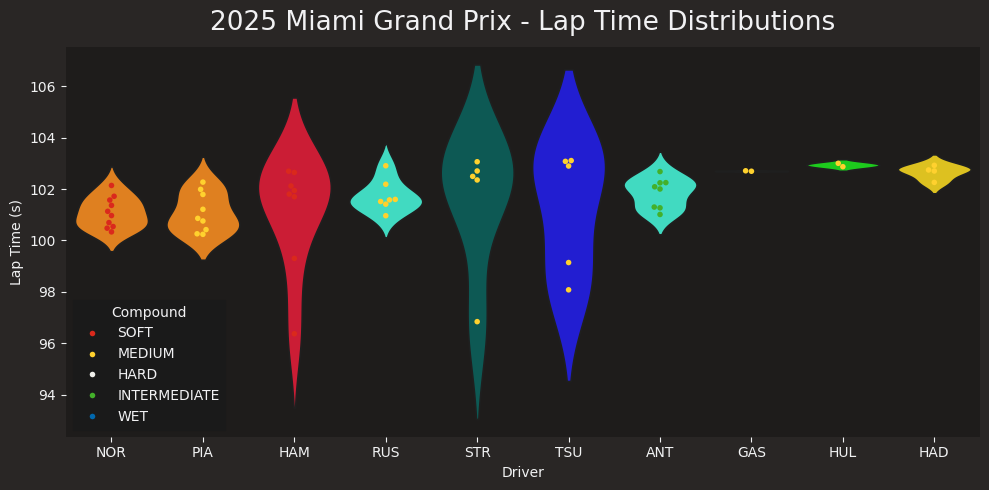

In [ ]:
# create the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Seaborn doesn't have proper timedelta support,
# so we have to convert timedelta to float (in seconds)
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="LapTime(s)",
               hue="Driver",
               inner=None,
               density_norm="area",
               order=finishing_order,
               palette=fastf1.plotting.get_driver_color_mapping(session=session)
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="LapTime(s)",
              order=finishing_order,
              hue="Compound",
              palette=fastf1.plotting.get_compound_mapping(session=session),
              hue_order=["SOFT", "MEDIUM", "HARD", "INTERMEDIATE", "WET"],
              linewidth=0,
              size=4,
              )

ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.title(f"{session.event.year} {session.event['EventName']} - Lap Time Distributions")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()